In [1]:
from joblib import Memory
import sklearn.datasets as sd
from sklearn import svm
import scipy.sparse as sparse

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext memory_profiler
%load_ext line_profiler

In [3]:
filelist = ["./url_svmlight/Day%s.svm" % i for i in range(0,121)]

In [4]:
def descriptiveStat (x):
    print ('Dataset lenght:', x.size)
    print ('Minimum value:', np.min(x))
    print ('Maximum value:', np.max(x))
    print ('Mean value:', np.mean(x))
    #print ('Median value:', np.median(x))

## Import file using standard python library

In [ ]:
content = []

for file in filelist:
    f = open(file)
    content += f.read() 

## Import file using sklearn datasets

In [5]:
mem = Memory("./cache")

In [6]:
@mem.cache
def get_data():
    data = sd.load_svmlight_files(filelist)
    return data

In [7]:
data = get_data()

In [8]:
days = np.array([(data[i], data[i+1]) for i in range(0, len(data)) if i%2==0])

In [10]:
len(days)

121

In [10]:
day0 = days[0]
day1 = days[1]

# Testing Day0

In [12]:
print(day0[0])

  (0, 3)	0.0788382
  (0, 4)	0.124138
  (0, 5)	0.117647
  (0, 10)	0.428571
  (0, 15)	0.1
  (0, 16)	0.749633
  (0, 17)	0.843029
  (0, 18)	0.197344
  (0, 20)	0.142856
  (0, 21)	0.142857
  (0, 22)	0.142857
  (0, 27)	1.0
  (0, 32)	0.0555556
  (0, 40)	0.1
  (0, 53)	1.0
  (0, 55)	1.0
  (0, 63)	1.0
  (0, 69)	1.0
  (0, 71)	1.0
  (0, 73)	1.0
  (0, 75)	1.0
  (0, 81)	1.0
  (0, 83)	1.0
  (0, 85)	1.0
  (0, 87)	1.0
  :	:
  (15999, 155191)	1.0
  (15999, 155192)	1.0
  (15999, 155193)	1.0
  (15999, 155194)	1.0
  (15999, 155195)	1.0
  (15999, 155196)	1.0
  (15999, 155197)	1.0
  (15999, 155198)	1.0
  (15999, 155199)	1.0
  (15999, 155200)	1.0
  (15999, 155201)	1.0
  (15999, 155202)	1.0
  (15999, 155203)	1.0
  (15999, 155204)	1.0
  (15999, 155205)	1.0
  (15999, 155206)	1.0
  (15999, 155207)	1.0
  (15999, 155208)	1.0
  (15999, 155209)	1.0
  (15999, 155210)	1.0
  (15999, 155211)	1.0
  (15999, 155212)	1.0
  (15999, 303785)	1.0
  (15999, 1418394)	1.0
  (15999, 2384702)	1.0


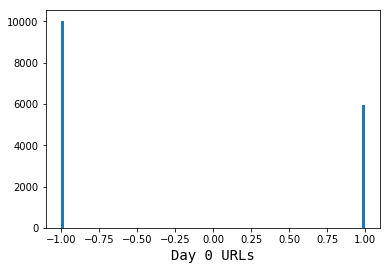

In [13]:
hist0 = plt.hist(day0[1], 100)
plt.xlabel("Day 0 URLs", fontdict={'fontsize': 14, 'family': 'monospace'})

plt.show()

In [11]:
descriptiveStat(day0[0])

Dataset lenght: 1847536
Minimum value: 0.0
Maximum value: 1.0
Mean value: 3.3005424586218573e-05


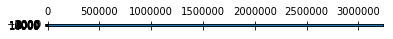

In [15]:
ax = plt.subplot()
ax.spy(day0[0], markersize=1, origin='lower')
plt.show()

# Testing all days

In [16]:
totalset = np.array([day[1] for day in days])

In [17]:
totalset_list = []

In [18]:
for day in days:
    totalset_list += day[1].tolist()

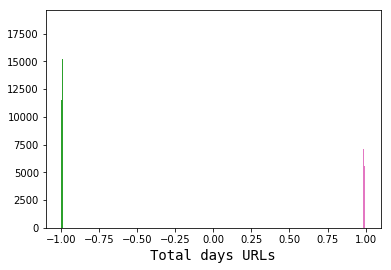

In [23]:
plt.hist(totalset, 100)
plt.xlabel("Total days URLs", fontdict={'fontsize': 14, 'family': 'monospace'})
plt.show()

In [19]:
df_days = pd.DataFrame(days, columns=['Attributes', 'URL Reputations'])

In [19]:
df_days

,Attributes,URL Reputations
0,"(0, 3)\t0.0788382\n (0, 4)\t0.124138\n (0,...","[-1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0..."
1,"(0, 3)\t0.0788382\n (0, 4)\t0.124138\n (0,...","[-1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, ..."
2,"(0, 1)\t1.0\n (0, 3)\t0.128631\n (0, 4)\t0...","[-1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0..."
3,"(0, 3)\t0.0705394\n (0, 4)\t0.117241\n (0,...","[1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1..."
4,"(0, 3)\t0.0373444\n (0, 4)\t0.0551724\n (0...","[-1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1...."
5,"(0, 3)\t0.0580913\n (0, 4)\t0.0896552\n (0...","[-1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1..."
6,"(0, 1)\t1.0\n (0, 3)\t0.0912863\n (0, 4)\t...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."
7,"(0, 1)\t1.0\n (0, 3)\t0.0622407\n (0, 4)\t...","[-1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1..."
8,"(0, 3)\t0.0580913\n (0, 4)\t0.0965517\n (0...","[1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -..."
9,"(0, 3)\t0.0539419\n (0, 4)\t0.0827586\n (0...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."


In [20]:
df_days.get('Attributes')

0        (0, 3)\t0.0788382\n  (0, 4)\t0.124138\n  (0,...
1        (0, 3)\t0.0788382\n  (0, 4)\t0.124138\n  (0,...
2        (0, 1)\t1.0\n  (0, 3)\t0.128631\n  (0, 4)\t0...
3        (0, 3)\t0.0705394\n  (0, 4)\t0.117241\n  (0,...
4        (0, 3)\t0.0373444\n  (0, 4)\t0.0551724\n  (0...
5        (0, 3)\t0.0580913\n  (0, 4)\t0.0896552\n  (0...
6        (0, 1)\t1.0\n  (0, 3)\t0.0912863\n  (0, 4)\t...
7        (0, 1)\t1.0\n  (0, 3)\t0.0622407\n  (0, 4)\t...
8        (0, 3)\t0.0580913\n  (0, 4)\t0.0965517\n  (0...
9        (0, 3)\t0.0539419\n  (0, 4)\t0.0827586\n  (0...
10       (0, 1)\t1.0\n  (0, 3)\t0.120332\n  (0, 4)\t0...
11       (0, 1)\t1.0\n  (0, 3)\t0.0746888\n  (0, 4)\t...
12       (0, 3)\t0.0871369\n  (0, 4)\t0.0551724\n  (0...
13       (0, 3)\t0.0705394\n  (0, 4)\t0.110345\n  (0,...
14       (0, 1)\t1.0\n  (0, 3)\t0.0705394\n  (0, 4)\t...
15       (0, 3)\t0.282158\n  (0, 4)\t0.0344828\n  (0,...
16       (0, 3)\t0.0414938\n  (0, 4)\t0.062069\n  (0,...
17       (0, 3)\t0.0414938\n  (

## Testing Sklearn SVM classification

In [12]:
clf = svm.SVC(C=100)

### Training test: data of day 0

In [13]:
clf.fit(day0[0], day0[1])

/home/giordano/anaconda3/envs/da2019/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Predicting data of Day 1

In [15]:
clf.predict(day1[0])

array([-1., -1., -1., ..., -1., -1., -1.])

In [19]:
clf.score(day1[0], day1[1])

0.8705

## Testing PCA

In [8]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
pd.SparseDataFrame(day0[0])

In [12]:
svd = TruncatedSVD(n_components=10)

In [13]:
svd.fit(totalattributes)

MemoryError: 

In [27]:
svd.explained_variance_ratio_.sum()

0.34053416640586137

# Test for Day 1

In [27]:
%%timeit
%memit sd.load_svmlight_file('url_svmlight/Day0.svm')

peak memory: 3724.99 MiB, increment: 0.09 MiB
peak memory: 3724.99 MiB, increment: 0.00 MiB
peak memory: 3724.99 MiB, increment: 0.00 MiB
peak memory: 3724.99 MiB, increment: 0.00 MiB
peak memory: 3724.99 MiB, increment: 0.00 MiB
peak memory: 3724.99 MiB, increment: 0.00 MiB
peak memory: 3725.00 MiB, increment: 0.00 MiB
peak memory: 3725.00 MiB, increment: 0.00 MiB
1.07 s ± 4.67 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
